<a href="https://colab.research.google.com/github/aasish-03/Iris_classification/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
#Read the dataset
df=pd.read_csv('IRIS.csv')
df.info()
#Check for null values in the dataset
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
#Encoding the target variable species and combining it with the dataset
df['species']=df['species'].astype('category')
df['Species']=df['species'].cat.codes
df.info()
#Drop the unencoded species variable
df=df.drop('species',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
 5   Species       150 non-null    int8    
dtypes: category(1), float64(4), int8(1)
memory usage: 5.2 KB


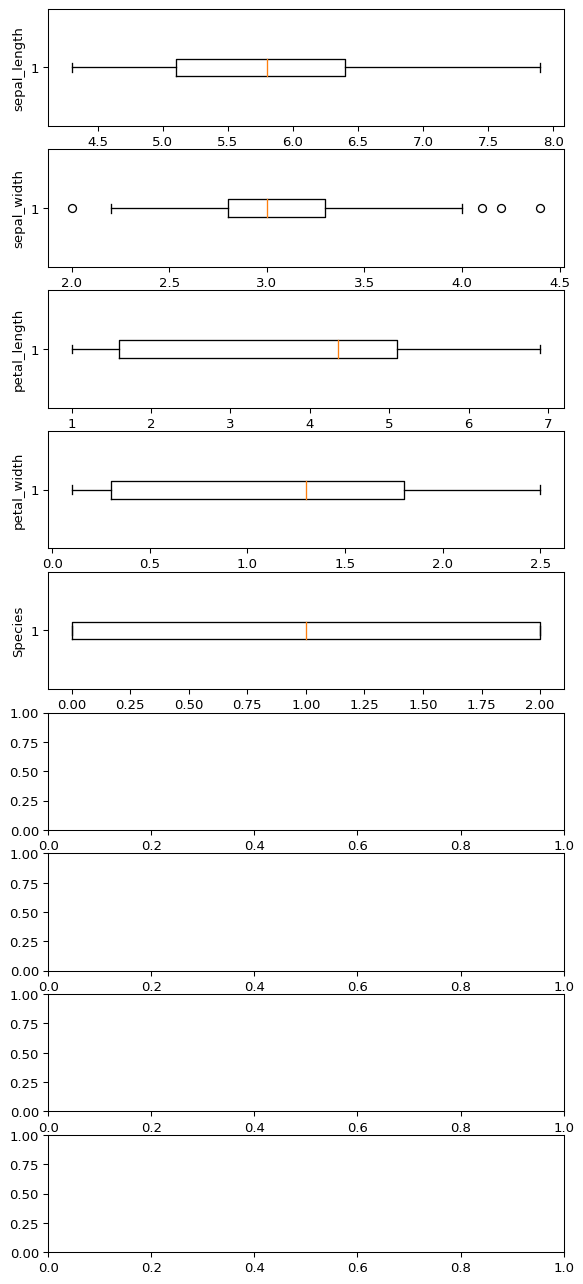

In [4]:
#Outlier Analysis
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [5]:
#Removal of outlier points
q1, q3 = np.percentile(df['sepal_width'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
df= df[(df['sepal_width'] >= lower_bound)
                & (df['sepal_width'] <= upper_bound)]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


  #Standardization of the iris dataset

In [6]:
scaler=StandardScaler()
data=scaler.fit_transform(df)
data.shape

(146, 5)

  #Splitting the dataset into training and test datasets

In [7]:
X=df.values
y=df['Species'].values
X=np.delete(X,4,axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102, 4)
(102,)
(44, 4)
(44,)


  #Fitting the logistic regression model on the training dataset

In [8]:
clf=LogisticRegression(random_state=0,max_iter=1000)#Take max_iter to be 1000 instead of 100 to attain convergence
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [9]:
#Classifying target variable for train dataset
pred_train=clf.predict(X_train)
#Classifying the target variable for test dataset
pred_test=clf.predict(X_test)

In [10]:
print(accuracy_score(y_train,pred_train),accuracy_score(y_test,pred_test))

0.9705882352941176 0.9772727272727273


In [11]:
#Plot confusion matrix for test dataset
confusion_matrix(y_test,pred_test)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]])